In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from matplotlib.lines import Line2D

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [5]:
#Creating a dataframe to store the data
weatherData = pd.DataFrame({'City': cities})

# Perform API Calls

In [6]:
#Intializing the start of the API call
print("Beginnign Data Retrieval")

#Setting counter
recordNumber = 1
setNumber = 1

#Running a loop over cities list
for index, row in weatherData.iterrows():
    
    #Getting the city name
    cityName = row['City']
    
    #Generating the URL
    url = f'http://api.openweathermap.org/data/2.5/weather?q={cityName}&APPID={api_key}&units=imperial'
    
    #Checking for any missing data
    try:
        #Making the API call
        data = requests.get(url).json()
        
        print(f'Processing Record {recordNumber} of Set {setNumber} | {cityName}')
        
        #Storing data directly in the dataframe
        weatherData.loc[index, 'Cloudiness'] = data['clouds']['all']
        weatherData.loc[index, 'Country'] = data['sys']['country']
        weatherData.loc[index, 'Date'] = data['dt']
        weatherData.loc[index, 'Humidity'] = data['main']['humidity']
        weatherData.loc[index, 'Lat'] = data['coord']['lat']
        weatherData.loc[index, 'Lng'] = data['coord']['lon']
        weatherData.loc[index, 'Max Temp'] = data['main']['temp_max']
        weatherData.loc[index, 'Wind Speed'] = data['wind']['speed']
        
        if(recordNumber == 50):
            recordNumber = 1
            setNumber += 1
        else:
            recordNumber += 1
    except:
        print('City not found. Skipping...')

Beginnign Data Retrieval
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | poum
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | aklavik
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | ilhabela
Processing Record 10 of Set 1 | mrirt
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | tessalit
Processing Record 13 of Set 1 | puerto leguizamo
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | matinha
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 

Processing Record 23 of Set 4 | sao francisco de paula
Processing Record 24 of Set 4 | arraial do cabo
Processing Record 25 of Set 4 | skibbereen
Processing Record 26 of Set 4 | cozumel
City not found. Skipping...
Processing Record 26 of Set 4 | ascension
City not found. Skipping...
Processing Record 26 of Set 4 | carnarvon
Processing Record 27 of Set 4 | touros
Processing Record 28 of Set 4 | kismayo
City not found. Skipping...
Processing Record 28 of Set 4 | whitehorse
Processing Record 29 of Set 4 | vryburg
Processing Record 30 of Set 4 | camacha
Processing Record 31 of Set 4 | cabo san lucas
Processing Record 32 of Set 4 | forli
Processing Record 33 of Set 4 | falealupo
City not found. Skipping...
Processing Record 33 of Set 4 | neryungri
Processing Record 34 of Set 4 | ryotsu
Processing Record 35 of Set 4 | saint george
Processing Record 36 of Set 4 | inuvik
Processing Record 37 of Set 4 | juxtlahuaca
Processing Record 38 of Set 4 | coelho neto
Processing Record 39 of Set 4 | chum

Processing Record 39 of Set 7 | velyka oleksandrivka
Processing Record 40 of Set 7 | toliary
City not found. Skipping...
Processing Record 40 of Set 7 | longyearbyen
Processing Record 41 of Set 7 | ndende
City not found. Skipping...
Processing Record 41 of Set 7 | bow island
Processing Record 42 of Set 7 | wairoa
Processing Record 43 of Set 7 | raymond
Processing Record 44 of Set 7 | nanortalik
Processing Record 45 of Set 7 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 7 | sibolga
Processing Record 46 of Set 7 | dali
Processing Record 47 of Set 7 | alenquer
Processing Record 48 of Set 7 | nykoping
Processing Record 49 of Set 7 | karla
Processing Record 50 of Set 7 | saint-denis
Processing Record 1 of Set 8 | general teran
Processing Record 2 of Set 8 | lethem
Processing Record 3 of Set 8 | tacuati
Processing Record 4 of Set 8 | oistins
Processing Record 5 of Set 8 | saint-pierre
Processing Record 6 of Set 8 | janakkala
Processing Record 7 of Set 8 | puerto escondido

Processing Record 16 of Set 11 | bermeo
Processing Record 17 of Set 11 | kununurra
Processing Record 18 of Set 11 | guerrero negro
Processing Record 19 of Set 11 | lecce
Processing Record 20 of Set 11 | alice springs
Processing Record 21 of Set 11 | ntcheu
Processing Record 22 of Set 11 | kirakira
Processing Record 23 of Set 11 | almaznyy
Processing Record 24 of Set 11 | vrangel
Processing Record 25 of Set 11 | morehead
Processing Record 26 of Set 11 | urumqi
City not found. Skipping...
Processing Record 26 of Set 11 | ruse
Processing Record 27 of Set 11 | rottingdean
Processing Record 28 of Set 11 | burkhala
City not found. Skipping...
Processing Record 28 of Set 11 | broome
Processing Record 29 of Set 11 | lalomanu
City not found. Skipping...
Processing Record 29 of Set 11 | maniitsoq
Processing Record 30 of Set 11 | punta cardon
Processing Record 31 of Set 11 | oulainen
Processing Record 32 of Set 11 | tual
Processing Record 33 of Set 11 | ostrovnoy
Processing Record 34 of Set 11 | 

In [7]:
weatherData = weatherData.dropna(how='any')
weatherData.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [8]:
#Store dataframe to a csv file
export_csv = weatherData.to_csv(output_data_file)

In [9]:
weatherData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,80.0,AU,1.574297e+09,42.0,-33.64,115.35,66.00,8.68
1,kapaa,40.0,US,1.574297e+09,74.0,22.08,-159.32,84.20,19.46
2,hasaki,20.0,JP,1.574297e+09,48.0,35.73,140.83,50.00,8.05
3,poum,0.0,MK,1.574297e+09,86.0,41.28,20.71,40.62,2.62
4,east london,34.0,ZA,1.574297e+09,78.0,-33.02,27.91,62.46,5.10


In [10]:
#Getting today's Date https://www.cyberciti.biz/faq/howto-get-current-date-time-in-python/
date = (time.strftime("%m/%d/%Y"))

'11/20/2019'

# Latitude vs. Temperature Plot

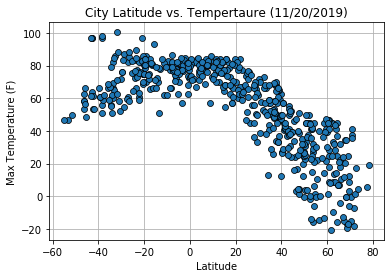

In [11]:
fig, temp = plt.subplots()
temp.plot(weatherData['Lat'], weatherData['Max Temp'], linestyle='none', marker = 'o', markeredgewidth =0.75, markeredgecolor='black')
temp.set_title(f"City Latitude vs. Tempertaure ({date})")
temp.grid()
temp.set_xlabel('Latitude')
temp.set_ylabel('Max Temperature (F)')
plt.show()

In [14]:
fig = temp.get_figure()
fig.savefig('Images/City Latitude vs. Tempertaure.png')

# Latitude vs. Humidity Plot

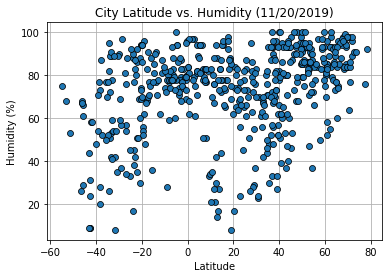

In [15]:
fig, humi = plt.subplots()
humi.plot(weatherData['Lat'], weatherData['Humidity'], linestyle='none', marker = 'o', markeredgewidth =0.75, markeredgecolor='black')
humi.set_title(f"City Latitude vs. Humidity ({date})")
humi.grid()
humi.set_xlabel('Latitude')
humi.set_ylabel('Humidity (%)')
plt.show()

In [19]:
fig = humi.get_figure()
fig.savefig('Images/City Latitude vs. Humidity.png')

# Latitude vs. Cloudiness

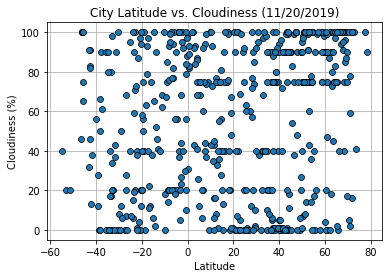

In [20]:
fig, clou = plt.subplots()
clou.plot(weatherData['Lat'], weatherData['Cloudiness'], linestyle='none', marker = 'o', markeredgewidth =0.75, markeredgecolor='black')
clou.set_title(f"City Latitude vs. Cloudiness ({date})")
clou.grid()
clou.set_xlabel('Latitude')
clou.set_ylabel('Cloudiness (%)')
plt.show()

# Latitude vs. Wind Speed

In [21]:
fig = clou.get_figure()
fig.savefig('Images/City Latitude vs. Cloudiness.png')

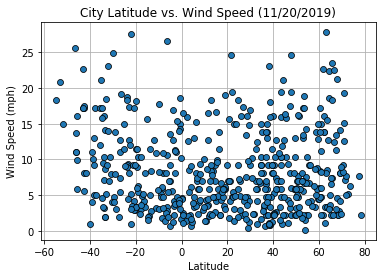

In [22]:
fig, wind = plt.subplots()
wind.plot(weatherData['Lat'], weatherData['Wind Speed'], linestyle='none', marker = 'o', markeredgewidth =0.75, markeredgecolor='black')
wind.set_title(f"City Latitude vs. Wind Speed ({date})")
wind.grid()
wind.set_xlabel('Latitude')
wind.set_ylabel('Wind Speed (mph)')
plt.show()

In [23]:
fig = wind.get_figure()
fig.savefig('Images/City Latitude vs. Wind Speed.png')